In [2]:
import comp_prob_inference
comp_prob_inference.flip_fair_coin()

'heads'

In [3]:
flips = comp_prob_inference.flip_fair_coins(100)

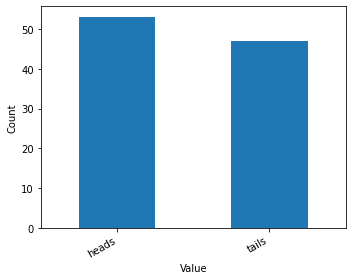

In [4]:
comp_prob_inference.plot_discrete_histogram(flips)

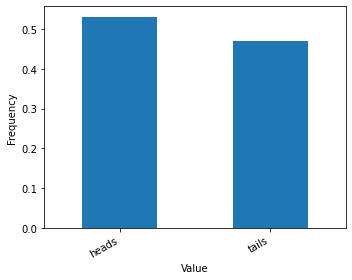

In [5]:
comp_prob_inference.plot_discrete_histogram(flips, frequency=True)

In [6]:
n = 100000
heads_so_far = 0
fraction_of_heads = []
for i in range(n):
    if comp_prob_inference.flip_fair_coin() == 'heads':
        heads_so_far += 1
    fraction_of_heads.append(heads_so_far / (i+1))

Text(0, 0.5, 'Fraction of heads')

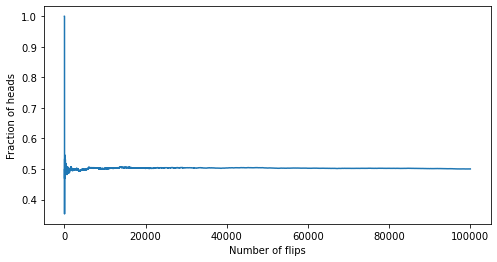

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(range(1, n+1), fraction_of_heads)
plt.xlabel('Number of flips')
plt.ylabel('Fraction of heads')

 - event and experiment
 
 there is underlying experiment, you can define probability of event happening of q. 
 
 for experient might not be repeatible, when not repeatible, you need to crate model to pridict the event

A few important remarks:

The sample space is always specified to be collectively exhaustive, meaning that every possible outcome is in it, and mutually exclusive, meaning that once the experiment is run (e.g., flipping the fair coin), exactly one possible outcome in the sample space happens. It's impossible for multiple outcomes in the sample space to simultaneously happen! It's also impossible for none of the outcomes to happen!

Probabilities can be thought of as fractions of times outcomes occur; thus, probabilities are nonnegative and at least 0 and at most 1.

If we add up the probabilities of all the possible outcomes in the sample space, we get 1.
(For the fair coin flip, P(heads)+P(tails)= 1/2 + 1/2 = 1.)

Some intuition for this: Consider the coin flipping experiment. What does the fraction of times heads occur and the fraction of times tails occur add up to? Since these are the only two possible outcomes (and again, recall that these outcomes are exclusive in that they can't simultaneously occur, and exhaustive since they are the only possible outcomes), these two fractions will always sum to 1. For a massive number of repeats of the experiment, these two fractions correspond to P(heads) and P(tails); the fractions sum to 1 and so these probabilities also sum to 1.

In [8]:
1./6

0.16666666666666666

In [9]:
1/6

0.16666666666666666

In [10]:
--4

4

In [11]:
prob_space = {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}
random_outcome = comp_prob_inference.sample_from_finite_probability_space(prob_space)
W = random_outcome
if random_outcome == 'sunny':
    I = 1
else:
    I = 0
    
print(W, I)

rainy 0


probability space is (Omega, P) where in Python noted with set: {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}

probability table is derived from probablity space that potentially relabelled the outcome

these 3 things are equal: probability table, probability mass funtion (PMF), probability distribution

pW = P(W = w), pI = P(I = i) where w in {'sunny', 'rainy', 'snowy'}, i in {1, 0}

In [12]:
pX = {}
for i in range(2, 13):
    pX[i] = set()
        
for i in range(1, 7):
    for j in range(1, 7):
        pX[i + j].add((i, j))
        
print(pX)

{2: {(1, 1)}, 3: {(1, 2), (2, 1)}, 4: {(3, 1), (1, 3), (2, 2)}, 5: {(2, 3), (3, 2), (4, 1), (1, 4)}, 6: {(2, 4), (1, 5), (5, 1), (4, 2), (3, 3)}, 7: {(3, 4), (4, 3), (6, 1), (1, 6), (2, 5), (5, 2)}, 8: {(4, 4), (6, 2), (2, 6), (5, 3), (3, 5)}, 9: {(6, 3), (4, 5), (5, 4), (3, 6)}, 10: {(4, 6), (6, 4), (5, 5)}, 11: {(5, 6), (6, 5)}, 12: {(6, 6)}}


In [13]:
pW = {}
for x in list(pX):
    pW[x] = len(pX[x]) / 36
    
print(pW)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


In [14]:
pmf = {}  # start with empty pmf
for x in range(1, 7):
    for y in range(1, 7):
        if (x+y) in pmf:
            pmf[x+y] += 1/36
        else:
            pmf[x+y] = 1/36
            
print(pmf)

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666669, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


joint probability table/distribution

pW,T => with two random variable and you can get probablity table for either W, T by summing either the row or the column of the joint table, which is called marginalizing

for probability space pW,V = {('sunny', 'hot'): 3/10, ('sunny', 'cold'): 1/5, ('rainy', 'hot'): 1/30, ('rainy', 'cold'): 2/15, ('snowy', 'hot'): 0, ('snowy', cold'): 1/3)

so if w = 'rainy', what would the probability table for T?

we can caculate with below conditioning calucations:

pT|W(hot|rainy)= 1 /30 | 1/6 = pW, T(rainy, hot) | pW (rainy) = 1 / 5



In [15]:
from simpsons_paradox_data import *

In [16]:
joint_prob_gender_admission = joint_prob_table.sum(axis=1)

In [17]:
joint_prob_gender_admission[gender_mapping['female'], admission_mapping['admitted']]

0.12298276623950503

In [18]:
female_only = joint_prob_gender_admission[gender_mapping['female']]

In [19]:
prob_admission_given_female = female_only / np.sum(female_only)

In [20]:
prob_admission_given_female_dict = dict(zip(admission_labels, prob_admission_given_female))
print(prob_admission_given_female_dict)

{'admitted': 0.3033351498637601, 'rejected': 0.6966648501362399}


In [21]:
male_only = joint_prob_gender_admission[gender_mapping['male']]

In [22]:
prob_admission_given_male = male_only / np.sum(male_only)

In [23]:
prob_admission_given_male_dict = dict(zip(admission_labels, prob_admission_given_male))
print(prob_admission_given_male_dict)

{'admitted': 0.44519509476031227, 'rejected': 0.5548049052396877}


In [24]:
admitted_only = joint_prob_gender_admission[:, admission_mapping['admitted']]

In [25]:
prob_gender_given_admitted = admitted_only / np.sum(admitted_only)
prob_gender_given_admitted_dict = dict(zip(gender_labels, prob_gender_given_admitted))
print(prob_gender_given_admitted_dict)

{'female': 0.3172274654630008, 'male': 0.6827725345369992}


In [26]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['A']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.8200000000000004, 'rejected': 0.1799999999999997}


In [27]:
male_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['A']]
prob_male_and_A_given_admitted = male_and_A_only / np.sum(male_and_A_only)
prob_male_and_A_given_admitted_dict = dict(zip(admission_labels, prob_male_and_A_given_admitted))
print (prob_male_and_A_given_admitted_dict)

{'admitted': 0.6200000000000001, 'rejected': 0.37999999999999984}


In [28]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['B']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.679999999999997, 'rejected': 0.3200000000000029}


In [29]:
female_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['B']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.6300000000000003, 'rejected': 0.3699999999999997}


In [30]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['C']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.3400000000000001, 'rejected': 0.6599999999999998}


In [31]:
female_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['C']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.37000000000000005, 'rejected': 0.63}


In [32]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['D']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.35, 'rejected': 0.6499999999999999}


In [33]:
female_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['D']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.3300000000000004, 'rejected': 0.6699999999999996}


In [34]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['E']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.23999999999999955, 'rejected': 0.7600000000000005}


In [35]:
female_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['E']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.27999999999999936, 'rejected': 0.7200000000000006}


In [36]:
female_and_A_only = joint_prob_table[gender_mapping['female'], department_mapping['F']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.0699999999999997, 'rejected': 0.9300000000000003}


In [37]:
female_and_A_only = joint_prob_table[gender_mapping['male'], department_mapping['F']]
prob_female_and_A_given_admitted = female_and_A_only / np.sum(female_and_A_only)
prob_female_and_A_given_admitted_dict = dict(zip(admission_labels, prob_female_and_A_given_admitted))
print (prob_female_and_A_given_admitted_dict)

{'admitted': 0.05999999999999988, 'rejected': 0.9400000000000001}


In [38]:
def get_prob_given_gender_depart(gender, depart):
    gd = joint_prob_table[gender_mapping[gender], department_mapping[depart]]
    gda = gd / np.sum(gd)
    gd_dict = dict(zip(admission_labels, gda))
    print (gd_dict)

In [39]:
for depart in department_labels:
    for gender in gender_labels:
        print(depart, gender)
        get_prob_given_gender_depart(gender, depart)

A female
{'admitted': 0.8200000000000004, 'rejected': 0.1799999999999997}
A male
{'admitted': 0.6200000000000001, 'rejected': 0.37999999999999984}
B female
{'admitted': 0.679999999999997, 'rejected': 0.3200000000000029}
B male
{'admitted': 0.6300000000000003, 'rejected': 0.3699999999999997}
C female
{'admitted': 0.3400000000000001, 'rejected': 0.6599999999999998}
C male
{'admitted': 0.37000000000000005, 'rejected': 0.63}
D female
{'admitted': 0.35, 'rejected': 0.6499999999999999}
D male
{'admitted': 0.3300000000000004, 'rejected': 0.6699999999999996}
E female
{'admitted': 0.23999999999999955, 'rejected': 0.7600000000000005}
E male
{'admitted': 0.27999999999999936, 'rejected': 0.7200000000000006}
F female
{'admitted': 0.0699999999999997, 'rejected': 0.9300000000000003}
F male
{'admitted': 0.05999999999999988, 'rejected': 0.9400000000000001}


In [40]:
for department in department_labels:
    for gender in gender_labels:
        restricted = joint_prob_table[gender_mapping[gender], department_mapping[department]]
        print(department, gender, dict(zip(admission_labels, restricted / np.sum(restricted)))['admitted'])

A female 0.8200000000000004
A male 0.6200000000000001
B female 0.679999999999997
B male 0.6300000000000003
C female 0.3400000000000001
C male 0.37000000000000005
D female 0.35
D male 0.3300000000000004
E female 0.23999999999999955
E male 0.27999999999999936
F female 0.0699999999999997
F male 0.05999999999999988
